In [1]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

In [2]:
# open the file of interest, and use pickle loading
signal_file = open ("Sample_pt_250_500.pkl",'rb')
sample_dict = pickle.load(signal_file)

# list all keys of the files
sample_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
background_file = open ("qcd_100000_pt_250_500.pkl",'rb')
background_dict = pickle.load(background_file)

# list all keys of the files
background_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [5]:
pt = new_dict['pt']
eta = new_dict['eta']     #used to identify jets. Likely the radial dimension of the cone. see below
phi = new_dict['phi']     #used to identify jets. Likely the azimuthal dimension of cone. see below 
mass = new_dict['mass']
ee2 = new_dict['ee2']     #ee2 and ee3 are energy correlation functions that describe distributions of  
ee3 = new_dict['ee3']     #the energy of particles hard scattered
d2 = new_dict['d2']
angularity = new_dict['angularity']   #can be seen as a measure of QCD radiation around the jet axis, i.e. as the radiation in a one-pronged jet.
t1 = new_dict['t1']
t2 = new_dict['t2']
t3 = new_dict['t3']
t21 = new_dict['t21']
t32 = new_dict['t32']
ktDeltaR = new_dict['KtDeltaR']    #the difference between two cones (delta R) of two subjets within the large R jet

NameError: name 'new_dict' is not defined

In [6]:
background_dict['mass']

0        125.298720
1         88.047054
2         85.794174
3         42.947328
4         59.542227
            ...    
99995     67.399102
99996     90.775772
99997    106.611253
99998     66.278542
99999     62.786390
Name: mass, Length: 100000, dtype: float64

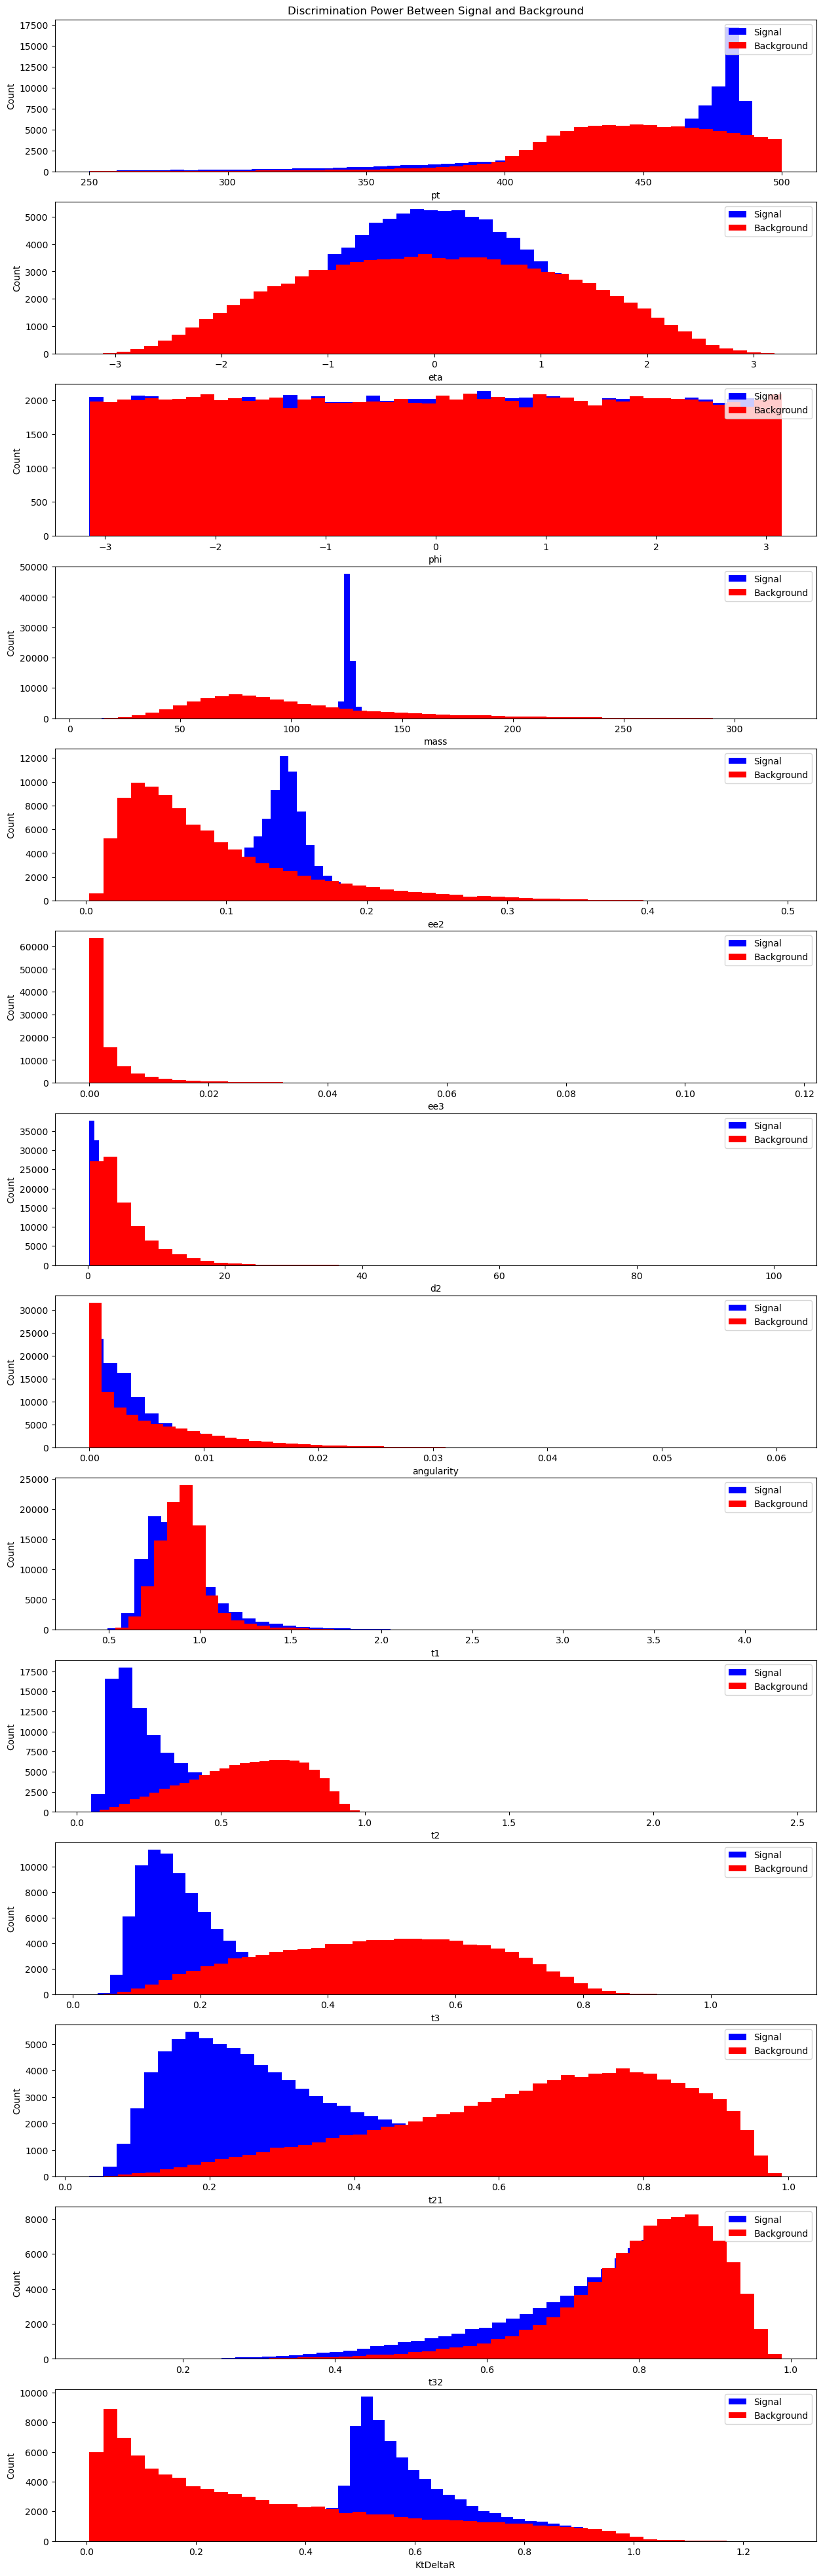

In [9]:
#there are 14 variables to check
fig,ax = plt.subplots(14,1, figsize = (15,50))
variables = ['pt','eta','phi','mass','ee2','ee3','d2','angularity','t1','t2','t3','t21','t32','KtDeltaR']
for i in range(0,14):
    ax[i].hist(sample_dict[variables[i]],color='blue',label= 'Signal',bins=50)
    ax[i].hist(background_dict[variables[i]],color='red',label= 'Background',bins = 50)
    ax[i].set_xlabel(variables[i])
    ax[i].set_ylabel('Count')
    ax[0].set_title('Discrimination Power Between Signal and Background')
    ax[i].legend(loc='upper right')
plt.show()


For most experiment variables, we are able to distinguish between the signal and background. Some, however, it is a little difficult to distinguish: phi, angularity, t32.

In [10]:
sample_pt = sample_dict['pt']
sample_eta = sample_dict['eta']     
sample_phi = sample_dict['phi']     
sample_mass = sample_dict['mass']
sample_ee2 = sample_dict['ee2']       
sample_ee3 = sample_dict['ee3']     
sample_d2 = sample_dict['d2']
sample_angularity = sample_dict['angularity']   
sample_t1 = sample_dict['t1']
sample_t2 = sample_dict['t2']
sample_t3 = sample_dict['t3']
sample_t21 = sample_dict['t21']
sample_t32 = sample_dict['t32']
sample_ktDeltaR = sample_dict['KtDeltaR']

In [11]:
background_pt = background_dict['pt']
background_eta = background_dict['eta']     
background_phi = background_dict['phi']     
background_mass = background_dict['mass']
background_ee2 = background_dict['ee2']       
background_ee3 = background_dict['ee3']     
background_d2 = background_dict['d2']
background_angularity = background_dict['angularity']   
background_t1 = background_dict['t1']
background_t2 = background_dict['t2']
background_t3 = background_dict['t3']
background_t21 = background_dict['t21']
background_t32 = background_dict['t32']
background_ktDeltaR = background_dict['KtDeltaR']

Now let's explore some relationships. We expect that the energy of a particle to decrease as its mass decreases, let's find out.

In [20]:
def plt_energy_mass(sampleX,sampleY,backgroundX,backgroundY):
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].scatter(sample_mass,sample_ee2)
    ax[0].set_title('Energy and Mass Correlation of the Signal Particle')
    ax[0].set_xlabel('Mass')
    ax[0].set_ylabel('Energy')
    ax[1].scatter(background_mass,background_ee2)
    ax[1].set_title('Energy and Mass Correlation of the Background Particle')
    ax[1].set_xlabel('Mass')
    ax[1].set_ylabel('Energy')

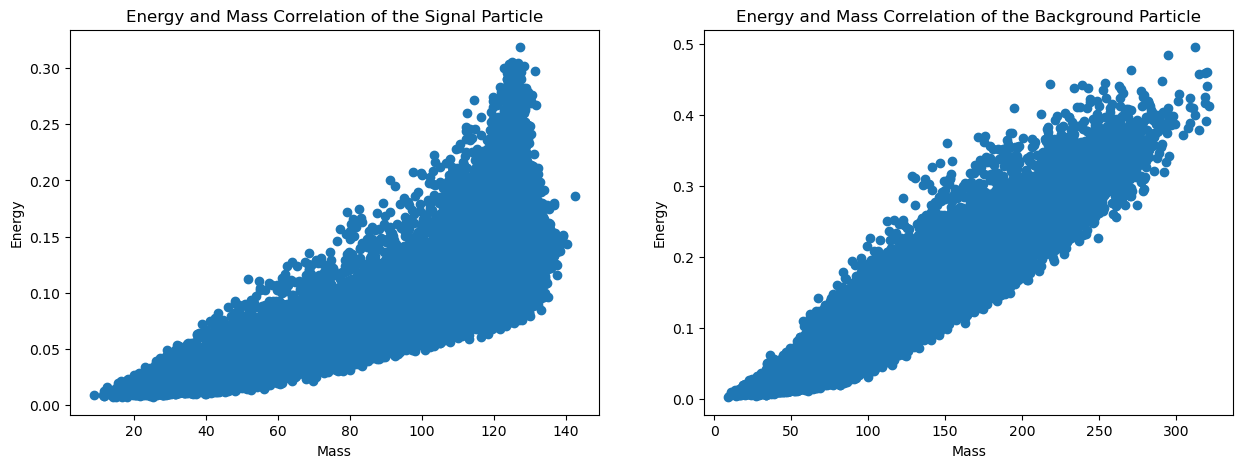

In [21]:
plt_energy_mass(sample_mass,sample_ee2,background_mass,background_ee2)

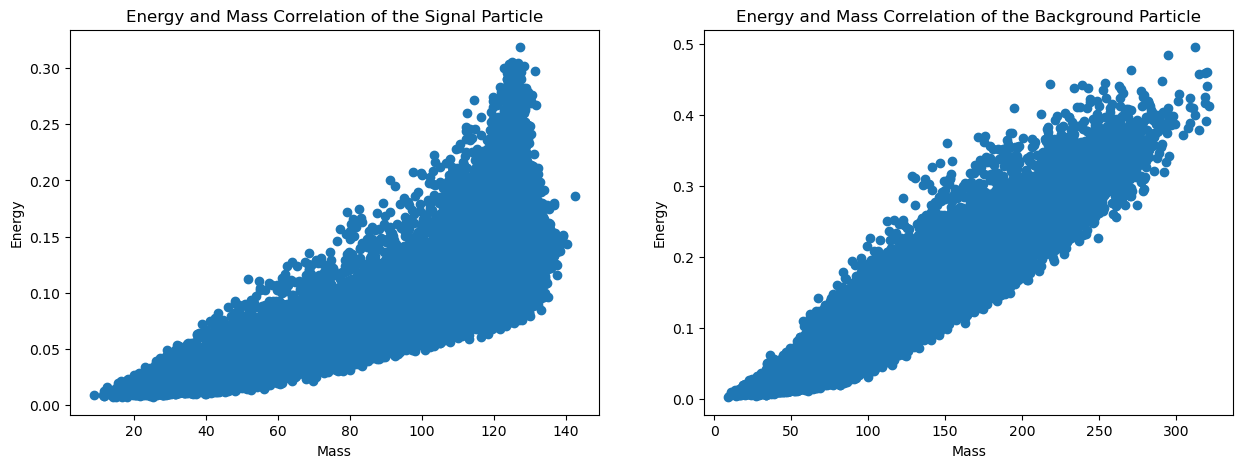

In [22]:
plt_energy_mass(sample_mass,sample_ee3,background_mass,background_ee3)

Above shows the mass-energy correlation of higgs particles (left) and the QCD (right). This proves my assumption of the energy-mass correlation of the particles we are studying. It might also be worth exploring the variables t1,t2,and t3 which describe the shape of the particle jet we are studying

In [25]:
from mpl_toolkits.mplot3d import Axes3D
def jet_shape(t1,t2,t3):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(t1,t2,t3)

<ipython-input-25-d0e34070b504>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


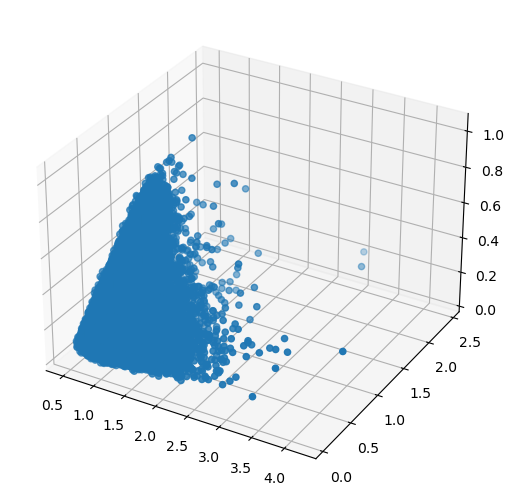

In [26]:
jet_shape(sample_t1,sample_t2,sample_t3)

<ipython-input-25-d0e34070b504>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


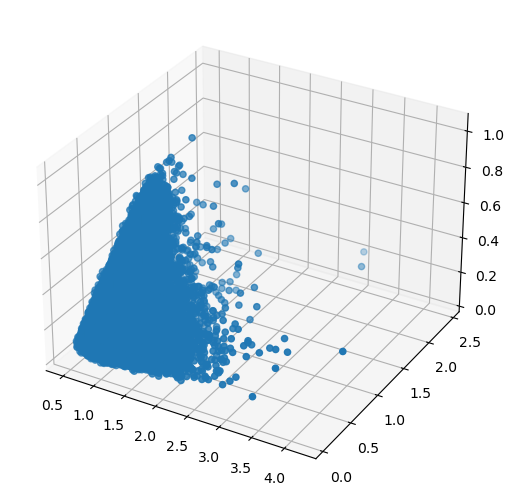

In [27]:
jet_shape(background_t1,background_t2,background_t3)

It looks like the jet begins at a concentrated point (0,0,0) and spreads out as expected from a particle jet. So, while t1, t2, and t3 could be independent of each other they help to describe the same picture. Let's see if there is any correlation with mass and energy.

In [33]:
def plt_mass_tn(sampleX,sampleY,backgroundX,backgroundY):
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].scatter(sampleX,sampleX)
    ax[0].set_title('Mass and tn Correlation in Higgs Data')
    ax[0].set_xlabel('tn')
    ax[0].set_ylabel('Mass')
    ax[1].scatter(backgroundX,backgroundX)
    ax[1].set_title('Mass and tn Correlation in QCD Data')
    ax[1].set_xlabel('tn')
    ax[1].set_ylabel('Mass')

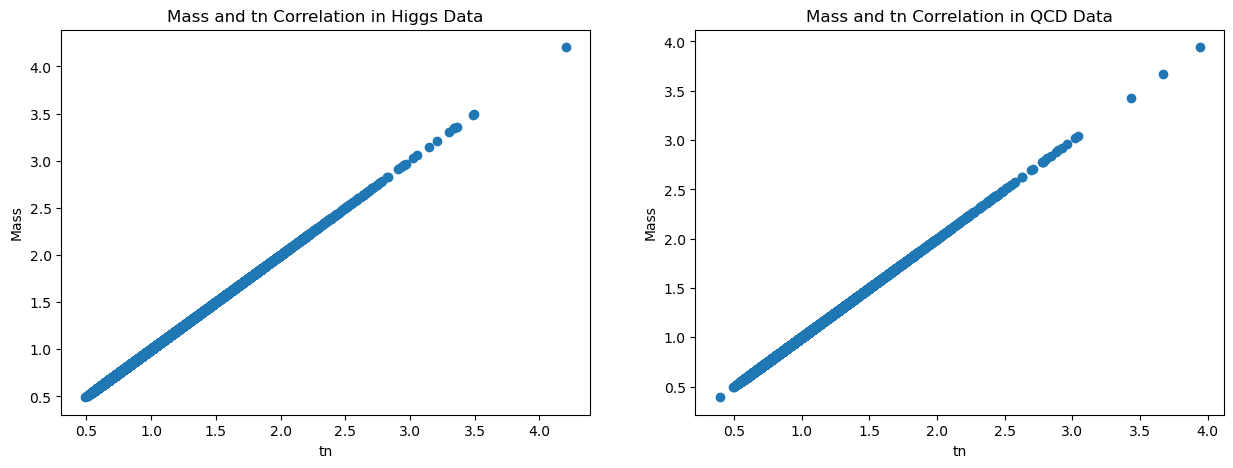

In [34]:
plt_mass_tn(sample_t1,sample_mass,background_t1,background_mass)

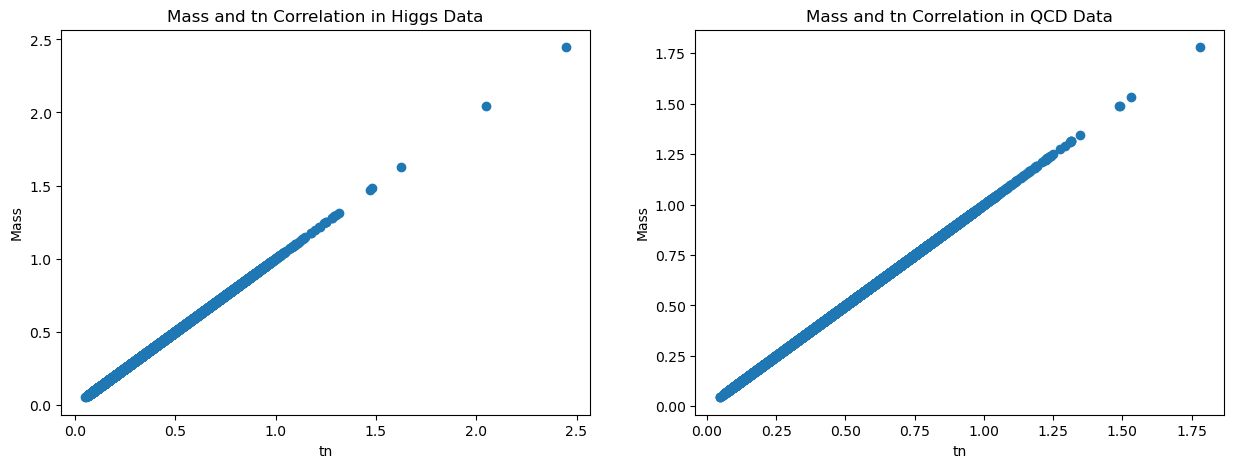

In [35]:
plt_mass_tn(sample_t2,sample_mass,background_t2,background_mass)

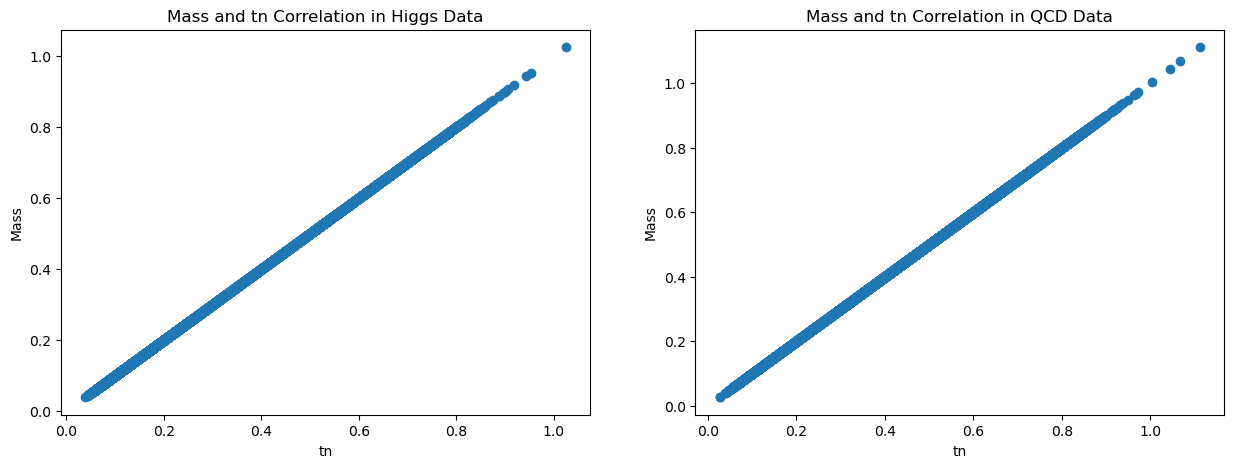

In [37]:
plt_mass_tn(sample_t3,sample_mass,background_t3,background_mass)

We can see a positive correlation. We know that the jet shape will also have a positive correlation with energy due to mass and energy relationship discussed before.

Now, we want to find the significance of our signal and eventually optimize the discovery sensitivity. In my data set, I am provided with 100 Higgs signals and 20000 background signals so we can make a preliminary calculation of the probability.

In [45]:
probability = poisson.cdf(20100,20000)
1 - probability

0.2384721219068744

We can optimize this by making an accurate background probability density function appropriate to our data and making cuts on background data.